# Image Classification using Yolov10

YOLOv10: Real-Time End-to-End Object Detection. YOLOv10 achieves state-of-the-art performance with significantly reduced computational overhead.

## 🛠️ Supported Hardware

This notebook can run in a CPU or in a GPU.

✅ AMD Instinct™ Accelerators  
✅ AMD Radeon™ RX/PRO Graphics Cards  
✅ AMD EPYC™ Processors  
✅ AMD Ryzen™ (AI) Processors  

Suggested hardware: **AI PC powered by AMD Ryzen™ AI Processors**

## ⚡ Recommended Software Environment

::::{tab-set}

:::{tab-item} Linux
- [Install Docker container](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::

:::{tab-item} Windows
- [Install Direct-ML](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu-windows.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::
::::

## 🎯 Goals

- Show you how to download several models from HuggingFace
- Run Yolov10 on an AMD platform
- Run inference with Yolov10 on an image
- Compare Yolov10 different model sizes

:::{seealso}
- Image classification using [Yolov10](https://huggingface.co/jameslahm/yolov10m)
- [YOLOv10: Real-Time End-to-End Object Detection Paper](https://arxiv.org/abs/2405.14458)
- [YOLOv10: Real-Time End-to-End Object Detection GitHub](https://github.com/THU-MIG/yolov10)
- [YOLOv10: Real-Time End-to-End Object Detection Docs](https://docs.ultralytics.com/models/yolov10/)
:::

Install the required libraries

In [ ]:
!pip install ultralytics git+https://github.com/THU-MIG/yolov10.git

## 🚀 Run Yolov10 on an AMD Platform

Import packages, in particular [Hugging Face `transformers`](https://huggingface.co/docs/transformers/en/index) that helps downloading the model from the Hugging Face repository.

In [2]:
from ultralytics import YOLOv10
from PIL import Image
import torch
from IPython.display import display

Get the yolov10 (medium) pre-trained model using the `YOLOv10` API

In [3]:
model = YOLOv10.from_pretrained('jameslahm/yolov10m')

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

```{note}
You can print the the model to see the different layers.
```
```python
print(model)
```

If a GPU is available, move the model to the GPU

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f'{device=}')

device=device(type='cuda')


Let's run inference using a sample image and then display the result.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 169k/169k [00:00<00:00, 605kB/s]


image 1/1 /ROCM_APP/get-started/hf/000000039769.jpg: 480x640 2 cats, 1 couch, 2 remotes, 1437.8ms
Speed: 1.4ms preprocess, 1437.8ms inference, 149.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


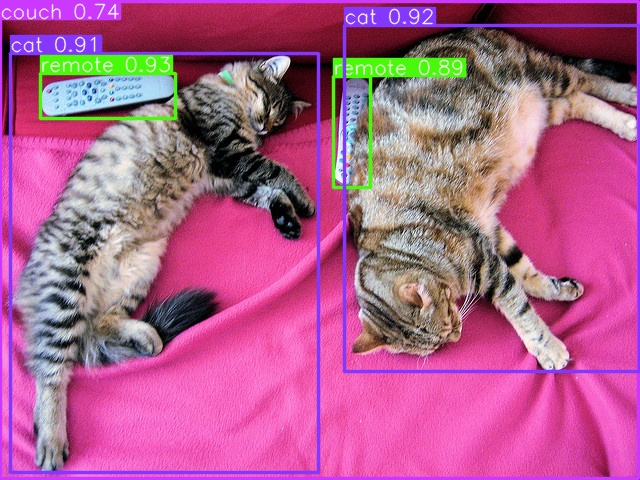

In [5]:
test_img = '000000039769.jpg'
result = model.predict(source=f'http://images.cocodataset.org/val2017/{test_img}', save=True)
image = Image.open(f'{result[0].save_dir}/{test_img}')
display(image)

Let's run multiple inferences inside of a loop


Found http://images.cocodataset.org/val2017/000000039769.jpg locally at 000000039769.jpg
image 1/1 /ROCM_APP/get-started/hf/000000039769.jpg: 480x640 2 cats, 1 couch, 2 remotes, 13.6ms
Speed: 1.3ms preprocess, 13.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


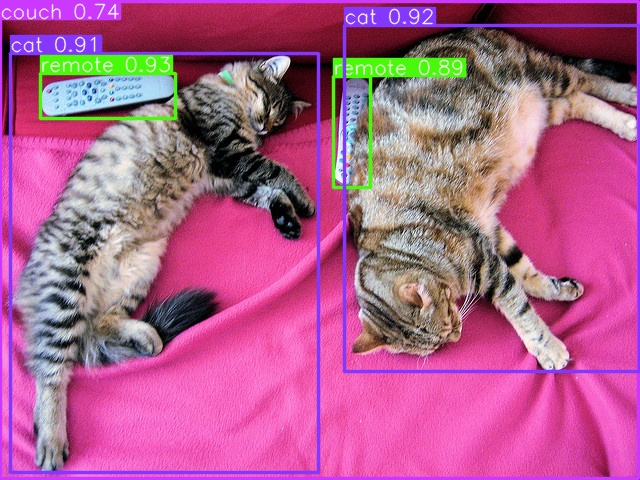

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 122k/122k [00:00<00:00, 385kB/s]


image 1/1 /ROCM_APP/get-started/hf/000000002157.jpg: 448x640 11 wine glasss, 2 cups, 2 knifes, 1 cake, 1 dining table, 1410.0ms
Speed: 1.9ms preprocess, 1410.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


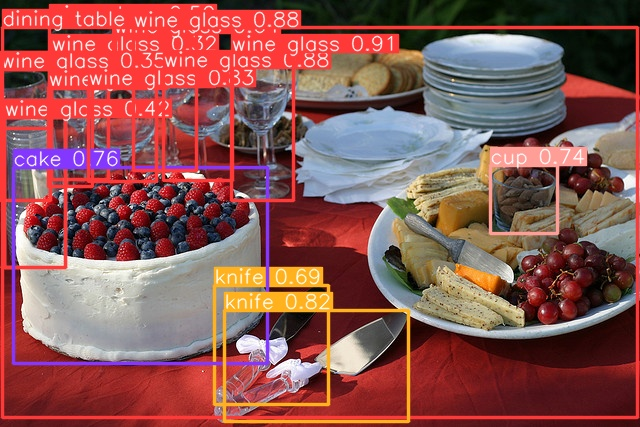

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 146k/146k [00:00<00:00, 446kB/s]

image 1/1 /ROCM_APP/get-started/hf/000000032610.jpg: 448x640 1 backpack, 1 tv, 3 laptops, 1 keyboard, 14.3ms
Speed: 1.5ms preprocess, 14.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


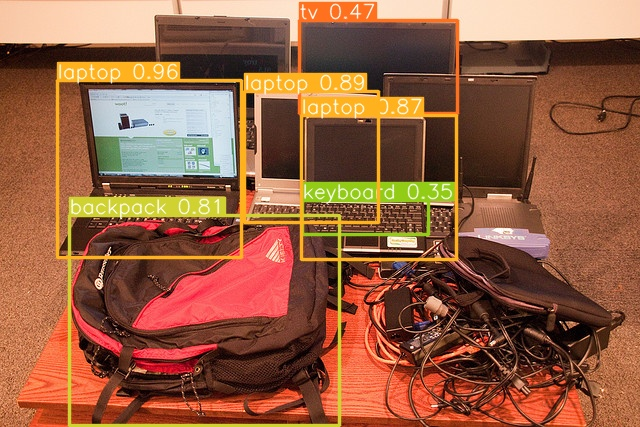

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 39.9k/39.9k [00:00<00:00, 447kB/s]

image 1/1 /ROCM_APP/get-started/hf/000000037777.jpg: 448x640 1 banana, 5 oranges, 2 chairs, 1 dining table, 1 oven, 1 refrigerator, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


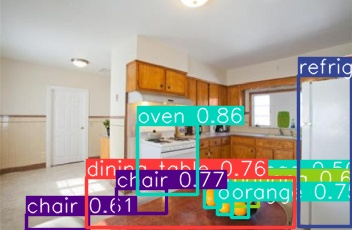

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 193k/193k [00:00<00:00, 689kB/s]

image 1/1 /ROCM_APP/get-started/hf/000000057597.jpg: 448x640 6 persons, 1 car, 1 sports ball, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


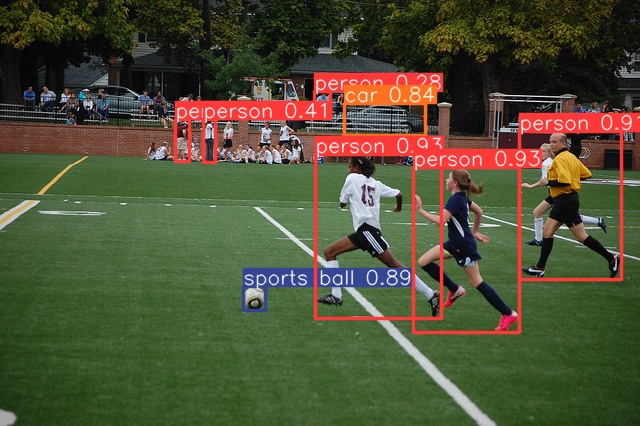

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 238k/238k [00:00<00:00, 558kB/s]

image 1/1 /ROCM_APP/get-started/hf/000000087470.jpg: 480x640 3 persons, 13 cows, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


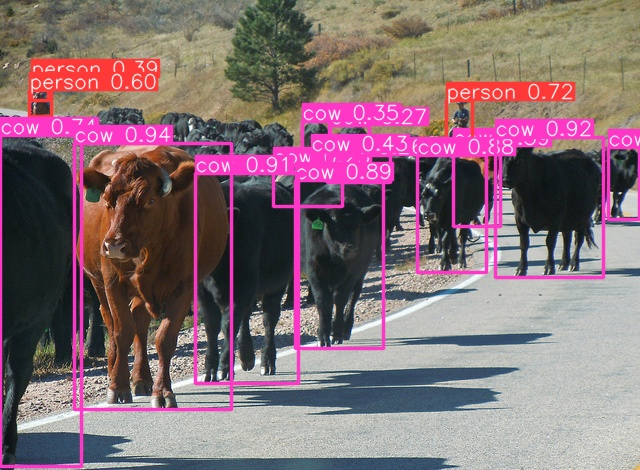

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 118k/118k [00:00<00:00, 381kB/s]

image 1/1 /ROCM_APP/get-started/hf/000000098520.jpg: 480x640 1 airplane, 2 trucks, 14.4ms
Speed: 2.4ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


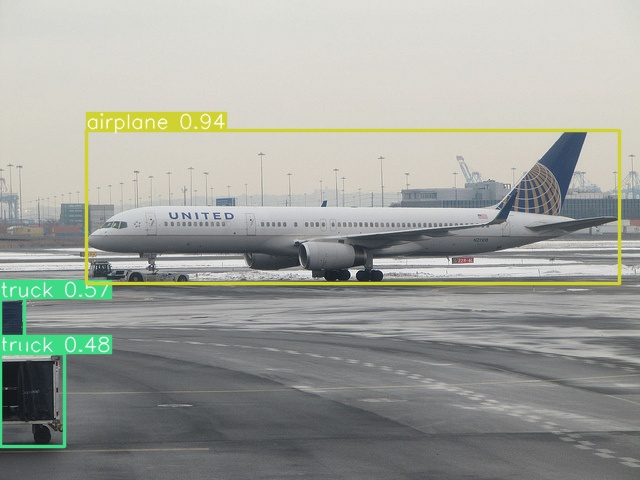

In [6]:
images = ['000000039769.jpg', '000000002157.jpg', '000000032610.jpg', '000000037777.jpg', '000000057597.jpg', '000000087470.jpg', '000000098520.jpg']
for test_img in images:
    result = model.predict(source=f'http://images.cocodataset.org/val2017/{test_img}', save=True)
    image = Image.open(f'{result[0].save_dir}/{test_img}')
    display(image)

There are a number of `Yolov10` models available, each with a different number of parameters. Running the cell below you will download 6 different `Yolov10` models and observe the number of parameters and the size of each model.

In [7]:
models = ['yolov10n', 'yolov10s', 'yolov10m', 'yolov10b', 'yolov10l', 'yolov10x']

def model_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    return param_size + buffer_size

for m in models:
    model = YOLOv10.from_pretrained(f'jameslahm/{m}')
    size_all_mb =  (model_size(model)) / 1024**2
    total_params = sum(p.numel() for p in model.parameters())
    print(f'Model: {m} with {total_params:10,} parameters, size: {size_all_mb:7.3f}MB')

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/11.2M [00:00<?, ?B/s]

Model: yolov10n with  2,775,520 parameters, size:  10.667MB


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/32.7M [00:00<?, ?B/s]

Model: yolov10s with  8,128,272 parameters, size:  31.169MB
Model: yolov10m with 16,576,768 parameters, size:  63.494MB


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/82.7M [00:00<?, ?B/s]

Model: yolov10b with 20,574,384 parameters, size:  78.790MB


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/104M [00:00<?, ?B/s]

Model: yolov10l with 25,888,688 parameters, size:  99.132MB


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/128M [00:00<?, ?B/s]

Model: yolov10x with 31,808,960 parameters, size: 121.883MB


```{tip}
Exercise for the reader, replace the `yolov10m` model (second cell of this notebook) with any other `Yolov10` model available and re run the notebook. Do you notice any difference in the accuracy of the classification?
```

----------
Copyright (C) 2025 Advanced Micro Devices, Inc. All rights reserved.

SPDX-License-Identifier: MIT